## Time series Forecasting of Stock prices of Walmart using ARIMA

This project focuses on a particular type of forecasting method called ARIMA modeling. ARIMA, short for ‘AutoRegressive Integrated Moving Average’, is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import datetime
from statistics import mean
from pandas.plotting import lag_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

Importing the csv dataset which contains details of the opening, closing, high and low prices and volume traded of the walmart stock and converting the same into a pandas dataframe.

In [15]:
walmart_df = pd.read_csv('WMT.csv')



'2021-05-17'

Next, I am evaluating the autocorrelation of the stock prices with a lag of 3. This represents the correlation between the current stock price at time t and the stock price at time (t-3). Note that there is strong positive autocorrelation with a lag of 3.

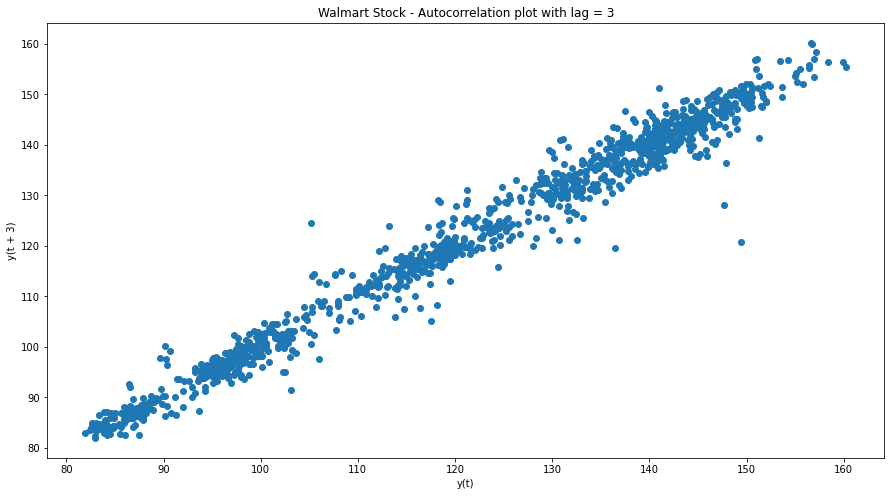

In [3]:
fig, ax = plt.subplots(figsize = (15,8))
lag_plot(walmart_df['Open'], lag=3)
plt.title('Walmart Stock - Autocorrelation plot with lag = 3')
plt.show()

Next, plotting the historical trends in the Walmart stock price. The figure below is a clear example of what non-stationary data looks like. 
The plot has a strong positive trend. Non-stationary data cannot be forecasted using traditional time series models and therefore, needs to be made stationary.

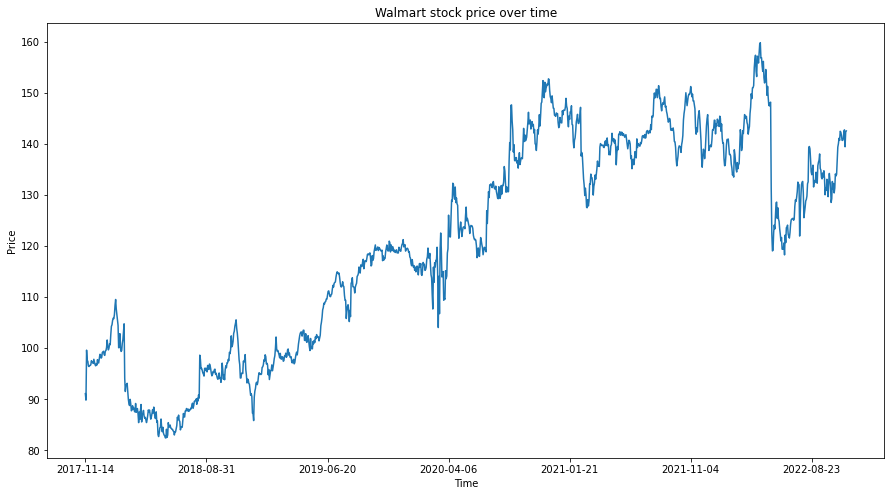

In [4]:
fig, ax = plt.subplots(figsize = (15,8))

plt.plot(walmart_df['Date'], walmart_df['Close'])
plt.xticks(np.arange(0, 1259, 200), walmart_df['Date'][0:1259:200])
plt.title('Walmart stock price over time')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

Here, I am transforming the non-stationary data into stationary data using a method of differencing. In other words, I have computer the delta in closing prices, price at time t minus price at time (t-1). We can see that the resultant data is stationary - which has a constant mean and variance.

In [5]:
close_price = walmart_df['Close']

close_price_delta = [(close_price[t] - close_price[t-1]) for t in range(1,len(close_price))]

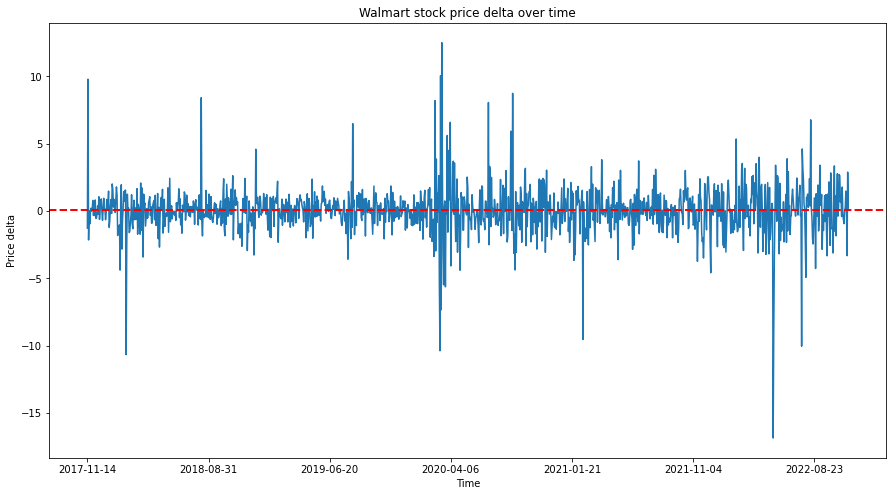

In [6]:
fig, ax = plt.subplots(figsize = (15,8))
plt.plot(walmart_df['Date'][1:], close_price_delta)
plt.xticks(np.arange(0, 1259, 200), walmart_df['Date'][0:1259:200])
plt.title('Walmart stock price delta over time')
plt.xlabel('Time')
plt.ylabel('Price delta')
plt.axhline(y= mean(close_price_delta), linewidth=4, color='r', linestyle = '--', lw=2)

plt.show()

Splitting the dataset into train & test data by taking 70% for training and 30% for testing.

In [7]:
train_data, test_data = walmart_df[0:int(len(walmart_df)*0.7)], walmart_df[int(len(walmart_df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values

history = [x for x in training_data]
N_test_observations = len(test_data)

Using the ARIMA model to forecast the stock prices for the period 05/17/2021 to 11/11/2022, which resulted in an MSE of 4.03% and MAPE of 0.98%

In [8]:
model_predictions = []
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
    
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error) + '%')

Testing Mean Squared Error is 4.030597463400429%


In [9]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [10]:
print('Testing Mean Absolute Percentage Error is {}'.format(mape(test_data, model_predictions)) + '%')


Testing Mean Absolute Percentage Error is 0.9770106440768191%


Plotting the actual stock prices and the predicted prices using ARIMA 

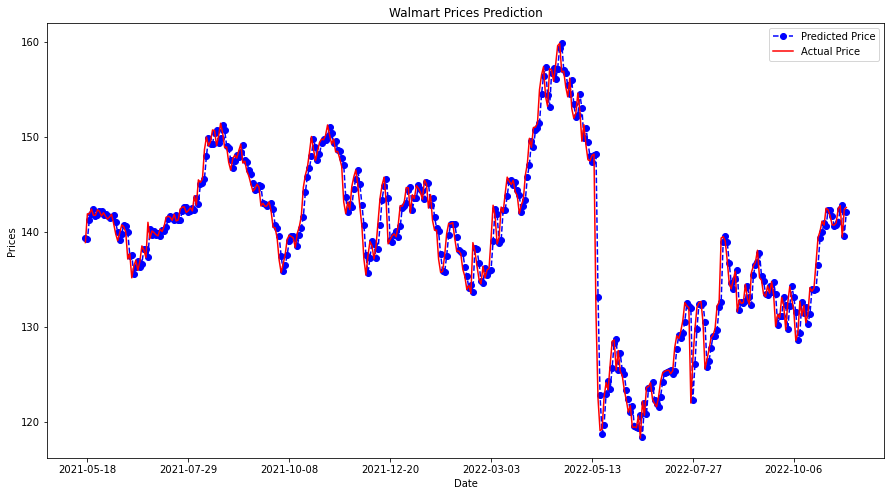

In [11]:
test_set_range = walmart_df[int(len(walmart_df)*0.7):].index
fig, ax = plt.subplots(figsize = (15,8))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('Walmart Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(881,1259,50), walmart_df.Date[881:1259:50])
plt.legend()
plt.show()